In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('custdata.csv')

In [3]:
df.head()

,custid,sex,is.employed,income,marital.stat,health.ins,housing.type,recent.move,num.vehicles,age,state.of.res
0,2068,F,NaN,11300,Married,True,Homeowner free and clear,False,2.0,49.0,Michigan
1,2073,F,NaN,0,Married,True,Rented,True,3.0,40.0,Florida
2,2848,M,True,4500,Never Married,False,Rented,True,3.0,22.0,Georgia
3,5641,M,True,20000,Never Married,False,Occupied with no rent,False,0.0,22.0,New Mexico
4,6369,F,True,12000,Never Married,True,Rented,True,1.0,31.0,Florida


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
custid          1000 non-null int64
sex             1000 non-null object
is.employed     672 non-null object
income          1000 non-null int64
marital.stat    1000 non-null object
health.ins      1000 non-null bool
housing.type    944 non-null object
recent.move     944 non-null object
num.vehicles    944 non-null float64
age             1000 non-null float64
state.of.res    1000 non-null object
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 79.2+ KB


In [365]:
# Cleaning and preparation
df['is.employed'].fillna(value = 'Unknown', inplace = True)
df = df[df['housing.type'].notnull()]
df = df[(df['age'] > 0) & (df['age'] < 99)]

# Convert target to 1 and 0
df['health_ins_num'] = 1
df['health_ins_num'][~df['health.ins']] = 0
df.drop('health.ins',axis = 1, inplace = True)

/Users/nguyenquang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [366]:
df['health_ins_num'].value_counts()

1    796
0    137
Name: health_ins_num, dtype: int64

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 933 entries, 0 to 999
Data columns (total 11 columns):
custid            933 non-null int64
sex               933 non-null object
is.employed       933 non-null object
income            933 non-null int64
marital.stat      933 non-null object
housing.type      933 non-null object
recent.move       933 non-null object
num.vehicles      933 non-null float64
age               933 non-null float64
state.of.res      933 non-null object
health_ins_num    933 non-null int64
dtypes: float64(2), int64(3), object(6)
memory usage: 87.5+ KB


## Decision Tree model 

### With 3 variables

In [395]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [396]:
x1 = df[['age','income']]

In [397]:
x_train, x_test, y_train, y_test = train_test_split(x1,df['health_ins_num'],
                                                    test_size = 0.4,
                                                   random_state = 10)

In [398]:
dtree = DecisionTreeClassifier(min_impurity_decrease = 0.01)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.01, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [399]:
p_predict = dtree.predict_proba(x_test)[:,1]
predictions = [1 if i > 0.8 else 0 for i in p_predict]
print(confusion_matrix(y_test, predictions))

[[ 37   8]
 [103 226]]


In [400]:
# Precision
from sklearn.metrics import accuracy_score, precision_score, recall_score# 264/(264+17)
print('Accuracy: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))


Accuracy: 0.97
Recall: 0.69
Accuracy: 0.70


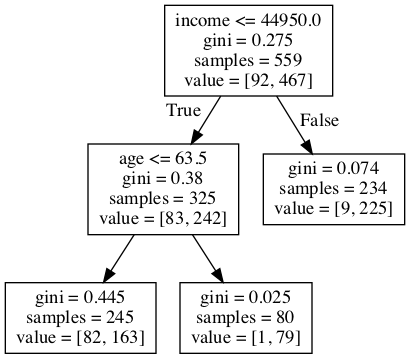

In [401]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot  # conda install pydot
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names = list(x_train))
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [402]:
# Entropy S0:
-92/(92+467)*np.log2(92/(92+467)) -467/(92+467)*np.log2(467/(92+467)) 

0.6451537189940715

### With all variables

In [403]:
x_train, x_test, y_train, y_test = train_test_split(x,df['health_ins_num'],
                                                    test_size = 0.4,
                                                   random_state = 10)

In [404]:
dtree = DecisionTreeClassifier(min_impurity_decrease = 0.003,
                              min_samples_split = 40)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.003, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=40,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [405]:
p_predict = dtree.predict_proba(x_test)[:,1]
predictions = [1 if i > 0.8 else 0 for i in p_predict]
print(confusion_matrix(y_test, predictions))

[[ 32  13]
 [ 72 257]]


In [406]:
# Precision
from sklearn.metrics import accuracy_score, precision_score, recall_score# 264/(264+17)
print('Accuracy: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))

Accuracy: 0.95
Recall: 0.78
Accuracy: 0.77


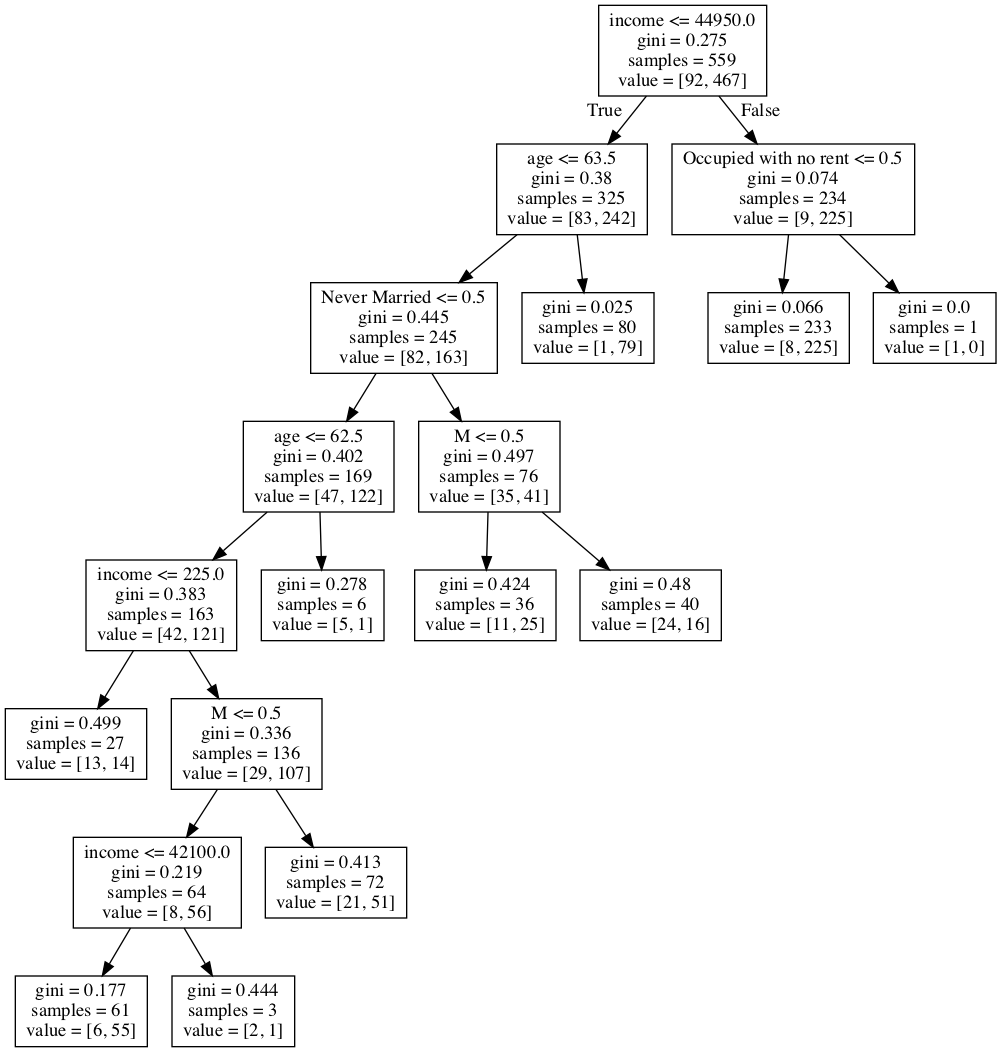

In [407]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot  # conda install pydot
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names = list(x_train))
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [409]:
p_predict = dtree.predict_proba(x_test)[:,1]
predictions = [1 if v > 0.8 else 0 for v in p_predict]

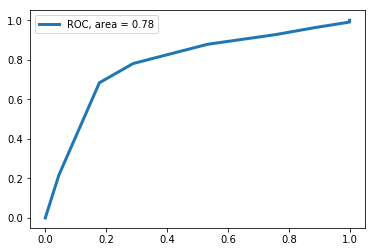

In [410]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, p_predict)
auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, lw = 3, label = "ROC, area = {:0.2f}".format(auc))
plt.legend()

# Random Forest model

In [411]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 300, max_features = 4,
                           min_impurity_decrease = 0.002,
                           min_samples_split = 30)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.002, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=30,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [412]:
p_predict = rf.predict_proba(x_test)[:,1]
predictions = [1 if v > 0.8 else 0 for v in p_predict]

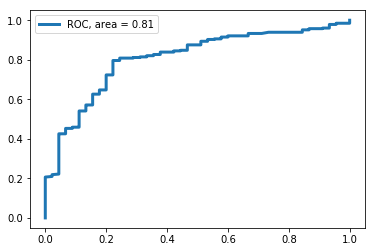

In [413]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test, p_predict)
auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, lw = 3, label = "ROC, area = {:0.2f}".format(auc))
plt.legend()

Text(0.5, 0, 'Relative Importance')

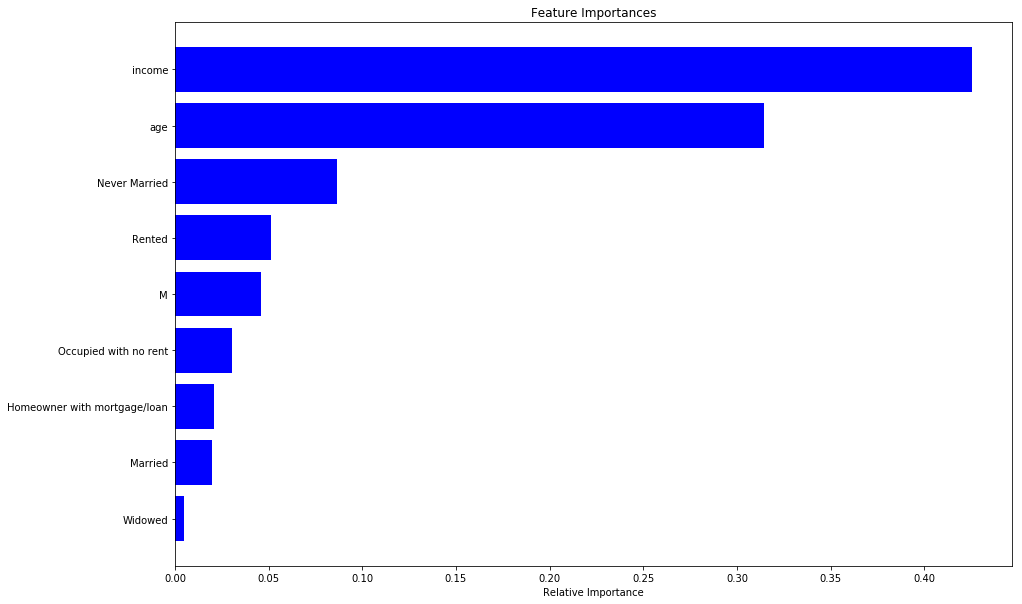

In [443]:
features = list(x_train)
features
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (15,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')